In [4]:
# ###########################################################################
# Color chart of named colors
# Version 0.1
# ###########################################################################

In [2]:
HEREDOC = '''
Determining complementary colors works. But the result is unsatis-
factory. The use of HSV and HSL probably gives a better result.

See also:
doc.sagemath.org/html/en/reference/plotting/sage/plot/colors.html
stackoverflow.com/questions/40233986/python-is-there-a-function-or-formula-to-find-the-complementary-colour-of-a-rgb

def hvlv(a, b, c):
    lv = min(a,b,c)
    hv = max(a,b,c)
    lv = lv / 2
    hv = hv / 2
    return (hv + lv)

def color_complement(r, g, b):
    #k =1
    k = hvlv(r, g, b)
    return tuple(k - u for u in (r, g, b))


def map_col(refcol):
    from sage.plot.colors import rgbcolor
    a, b, c = rgbcolor(refcol)
    #a, b, c = 1-a, 1-b, 1-c
    a, b, c = color_complement(a, b, c)
    newcol = Color(a,b,c).html_color()
    return newcol
'''

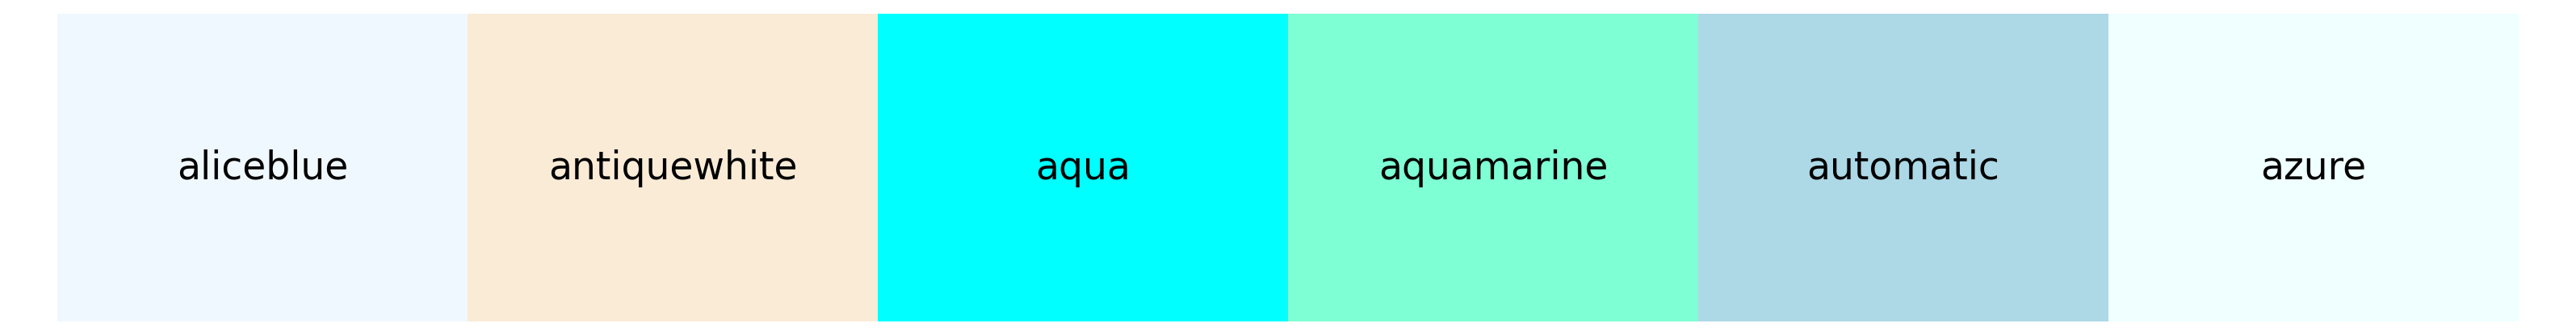

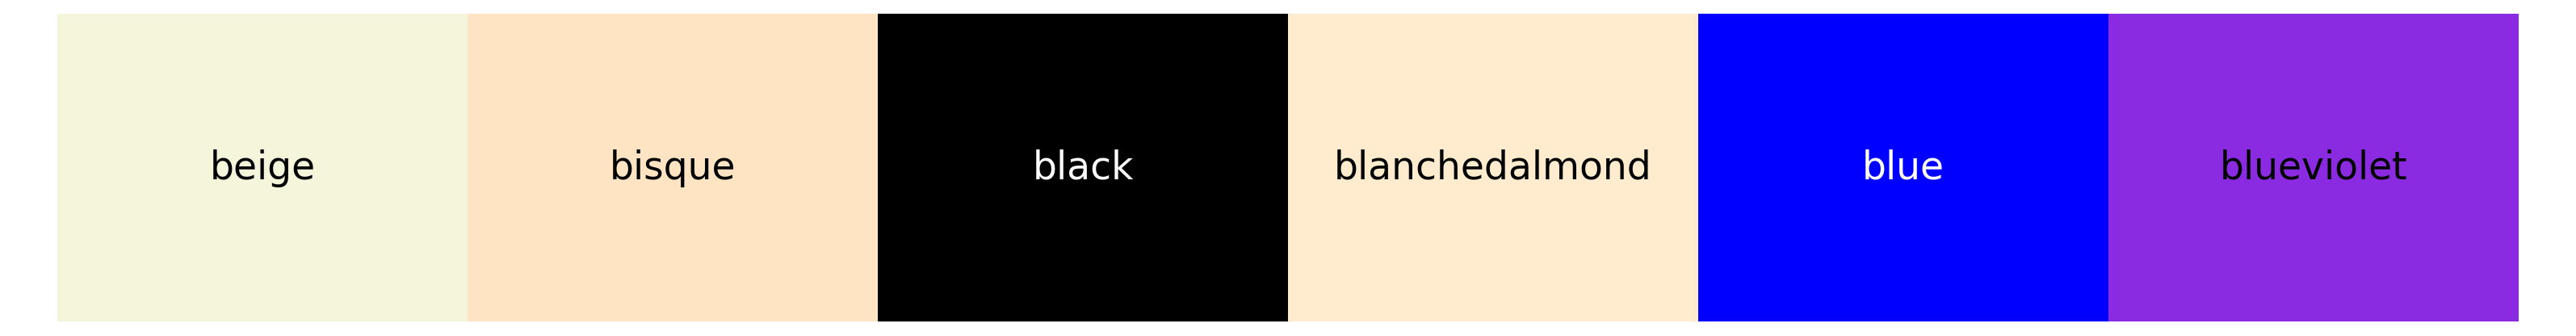

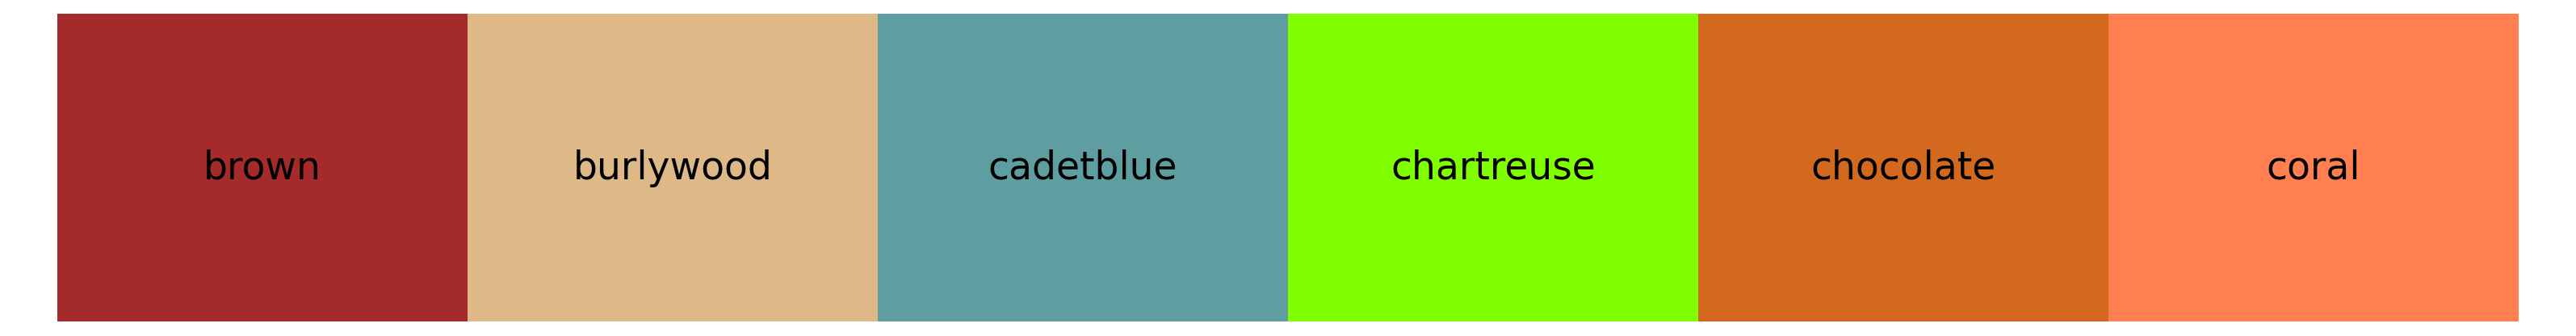

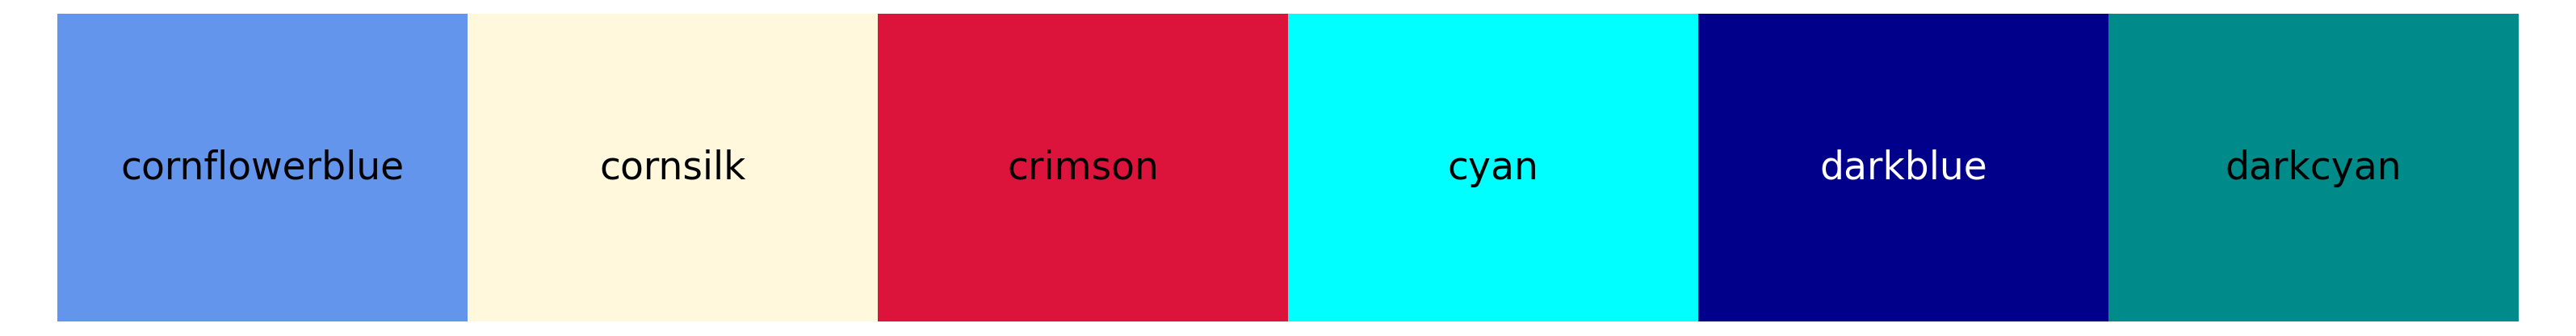

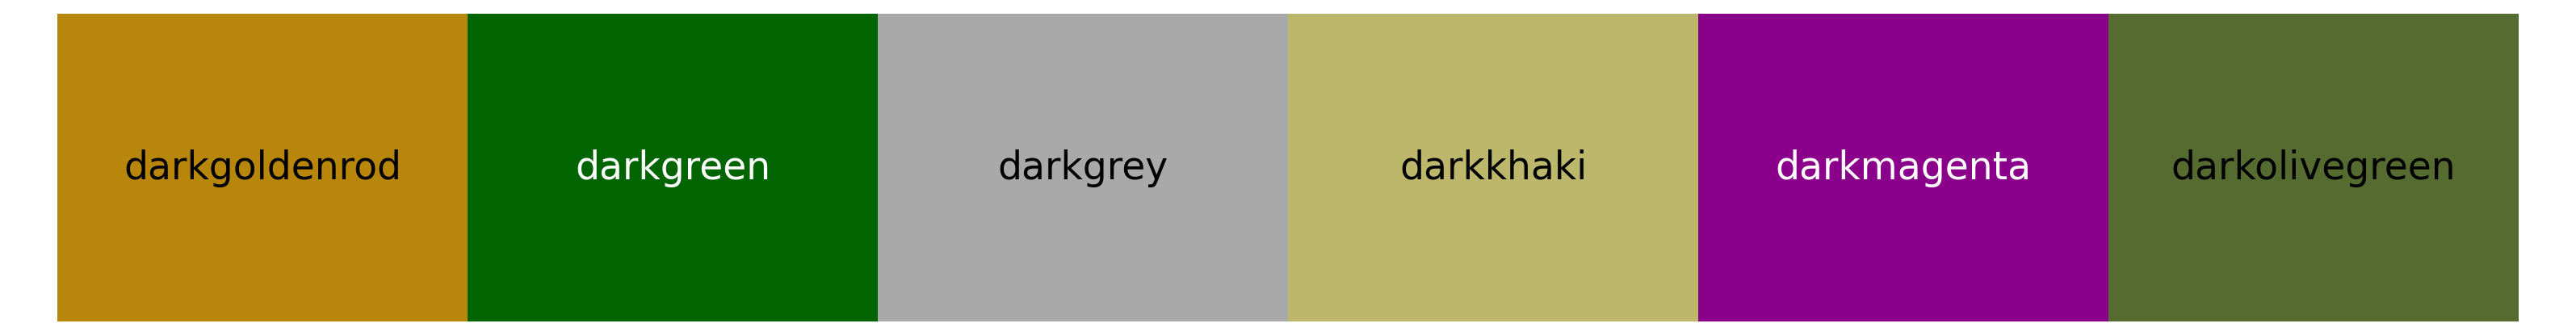

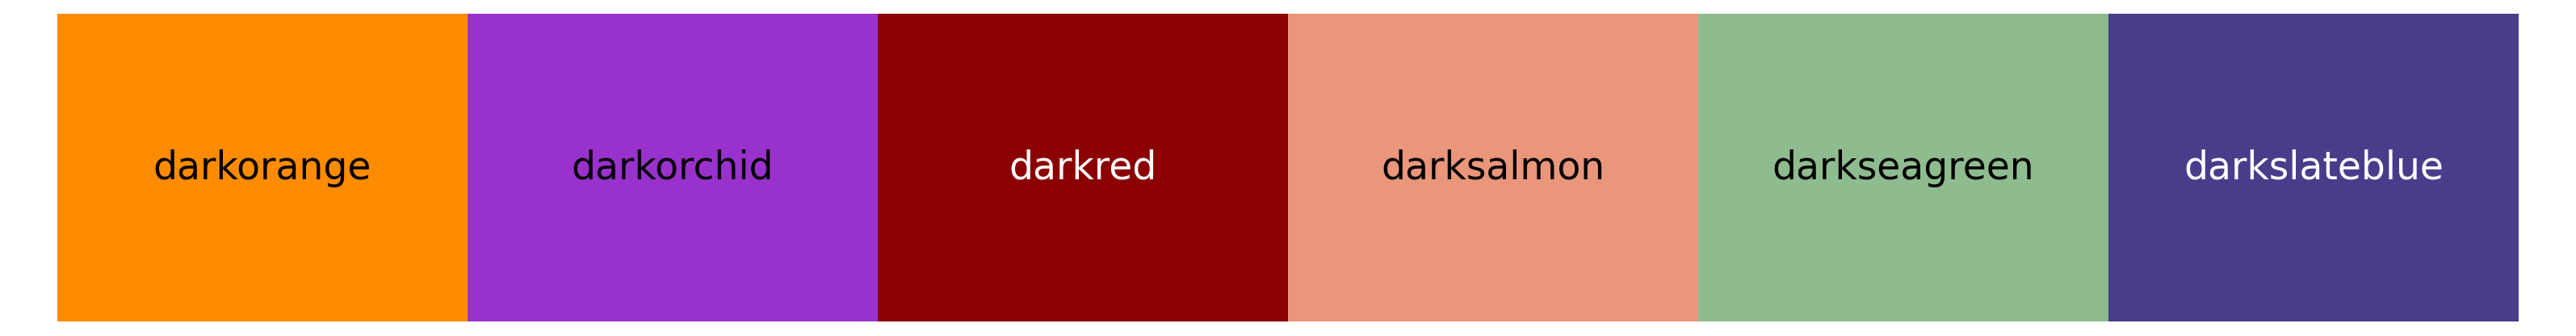

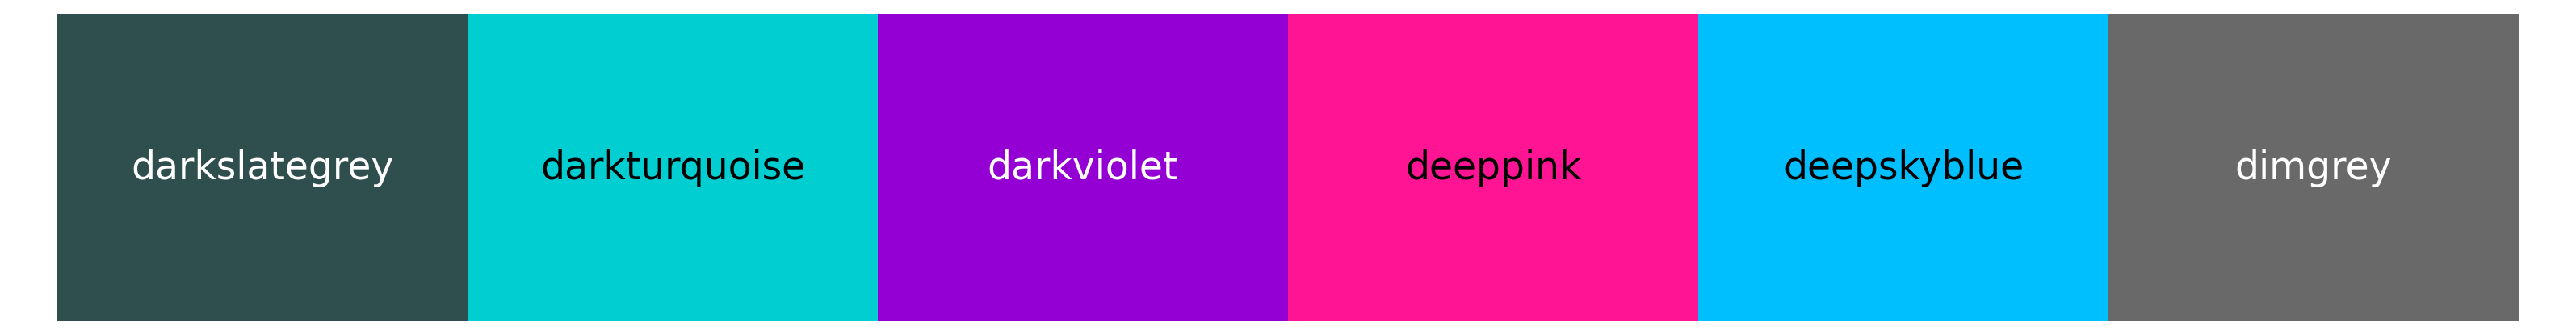

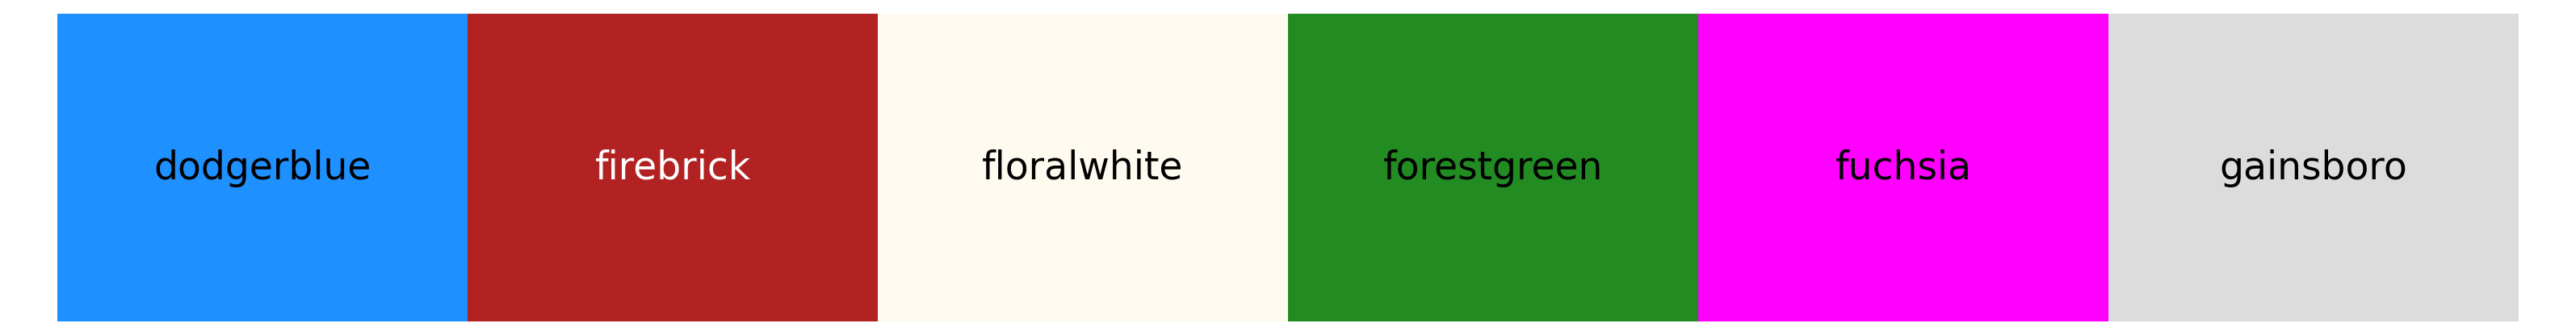

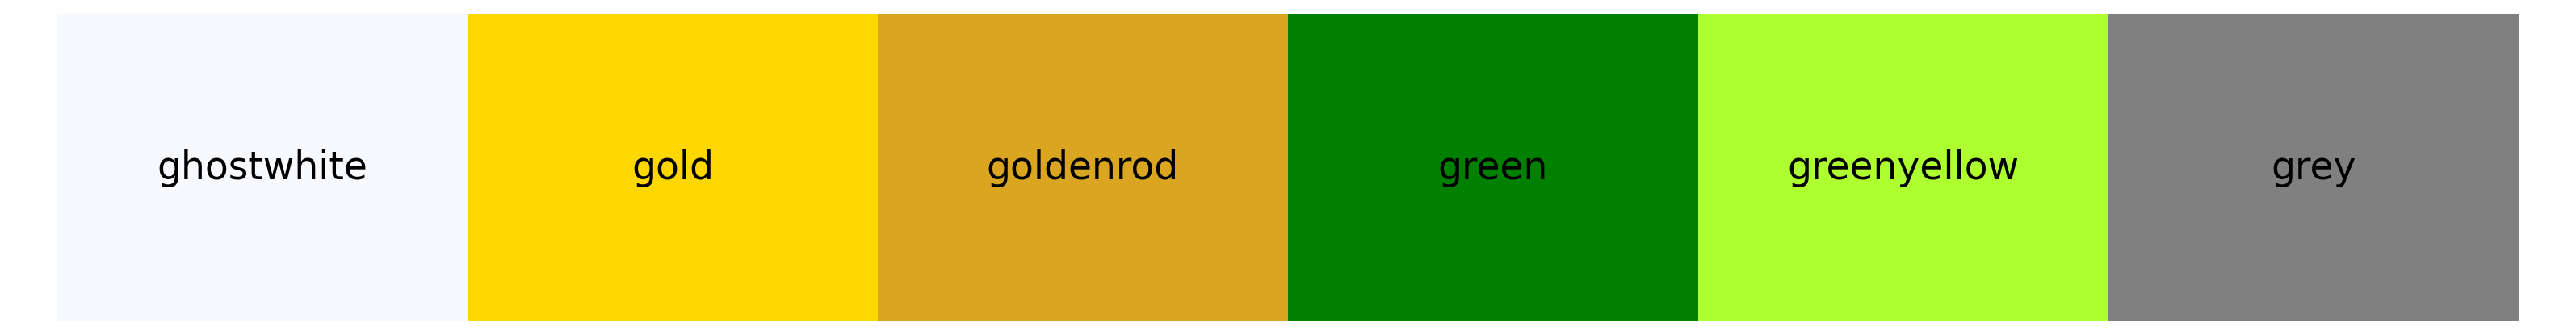

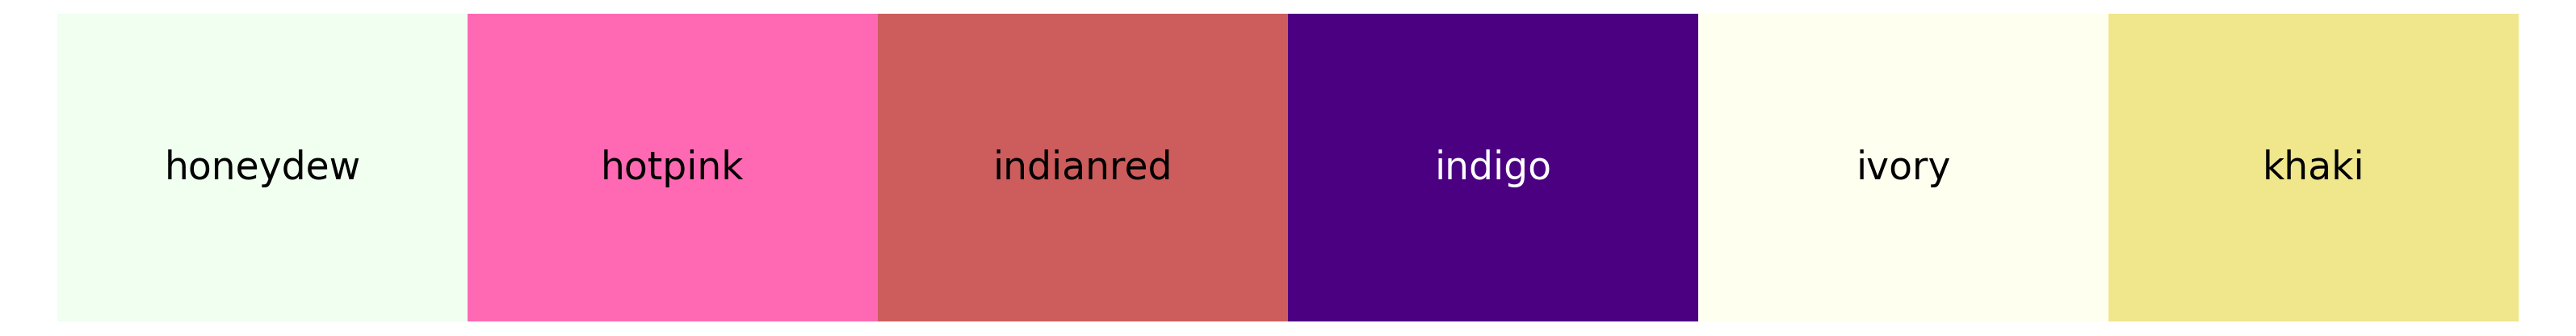

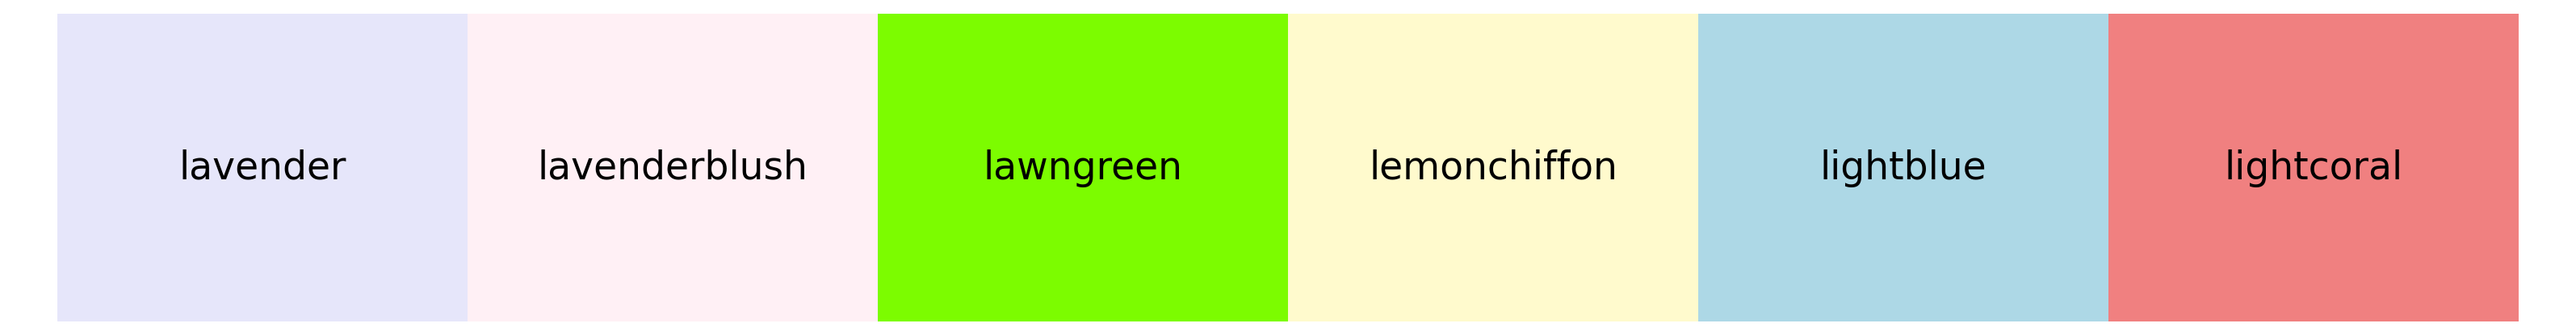

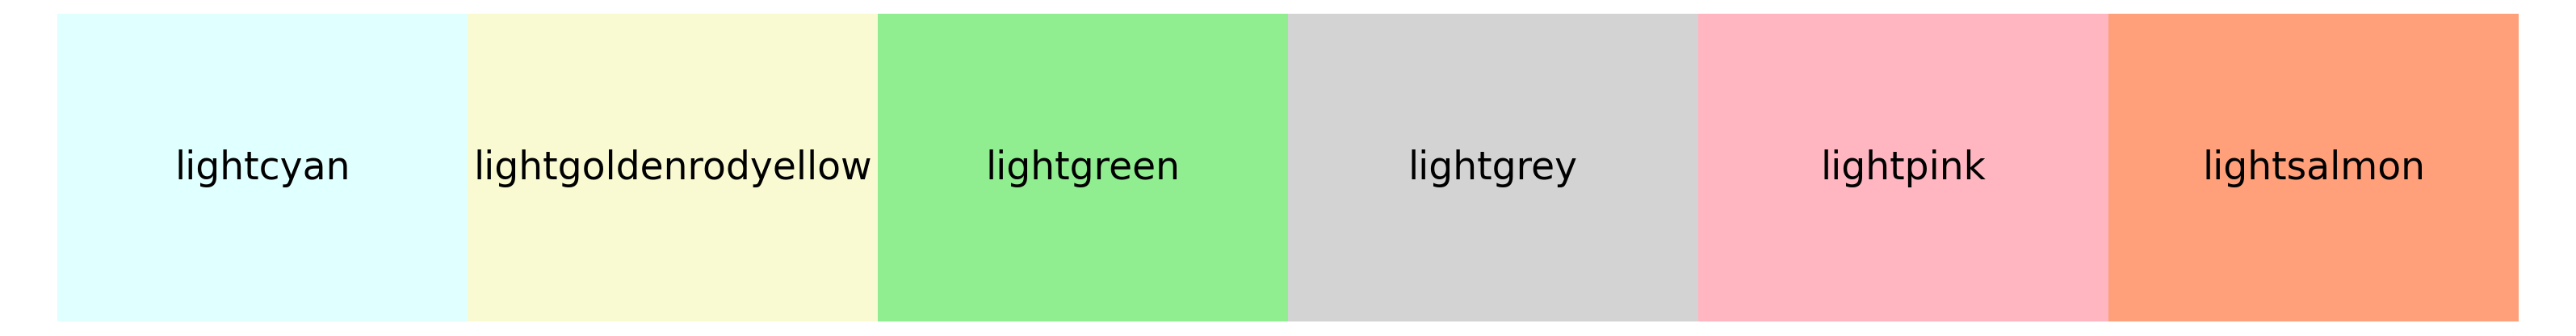

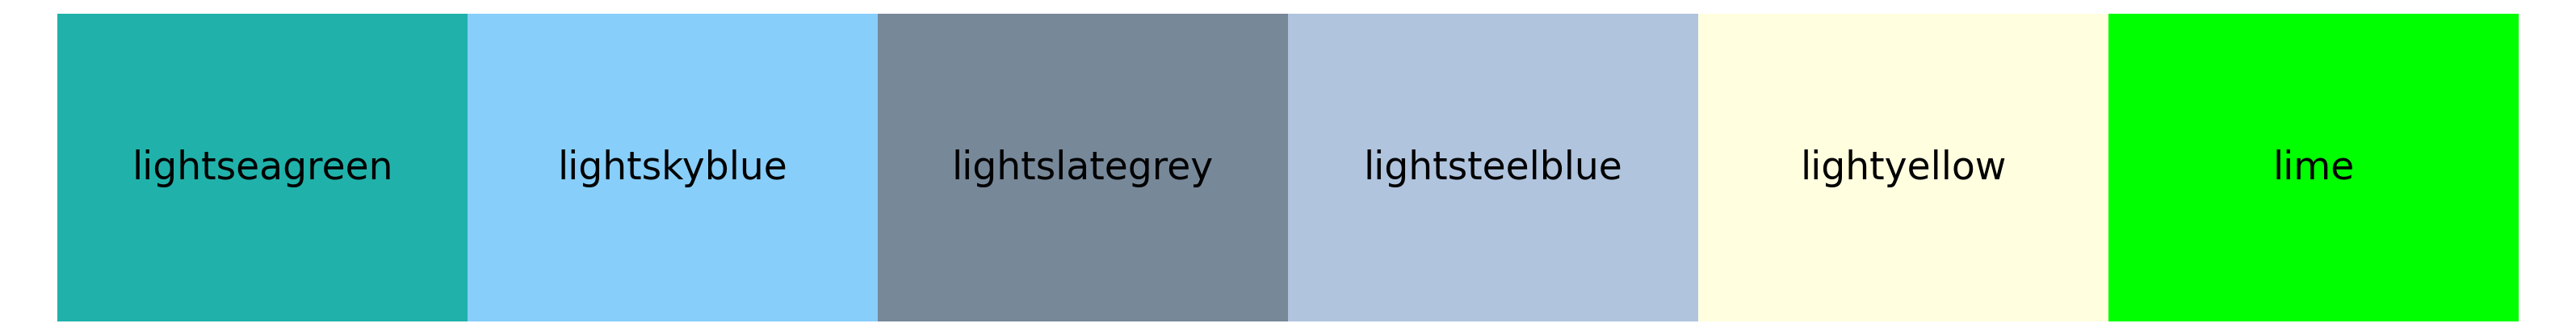

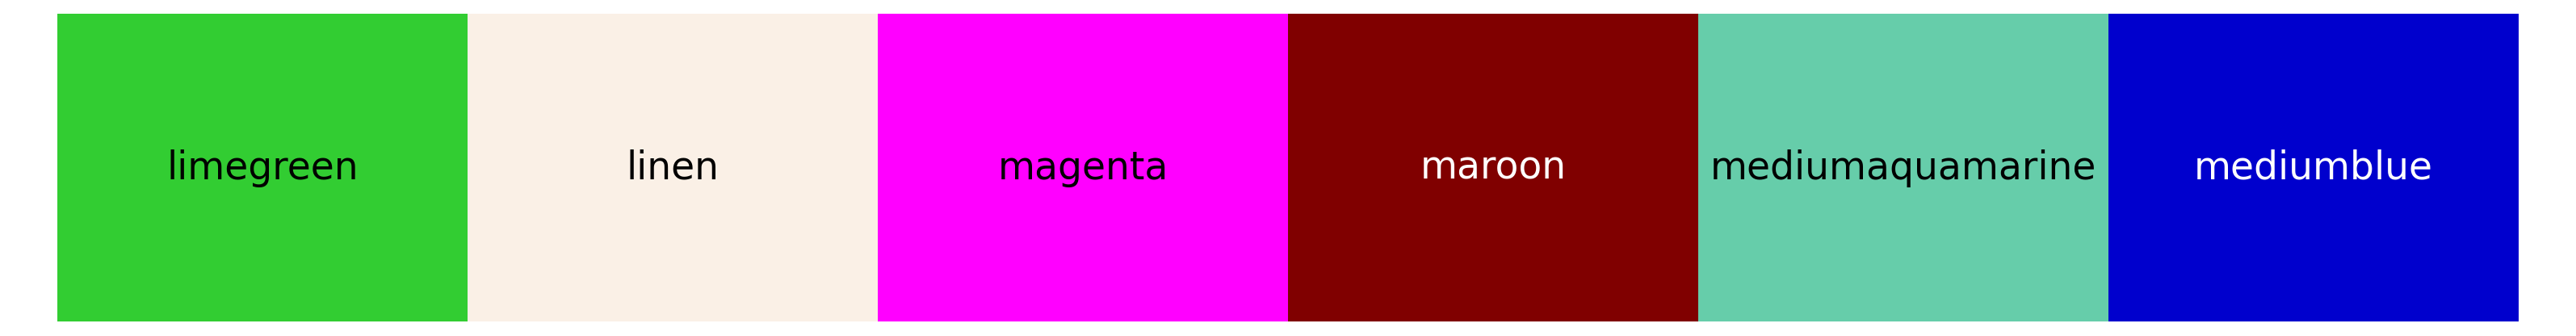

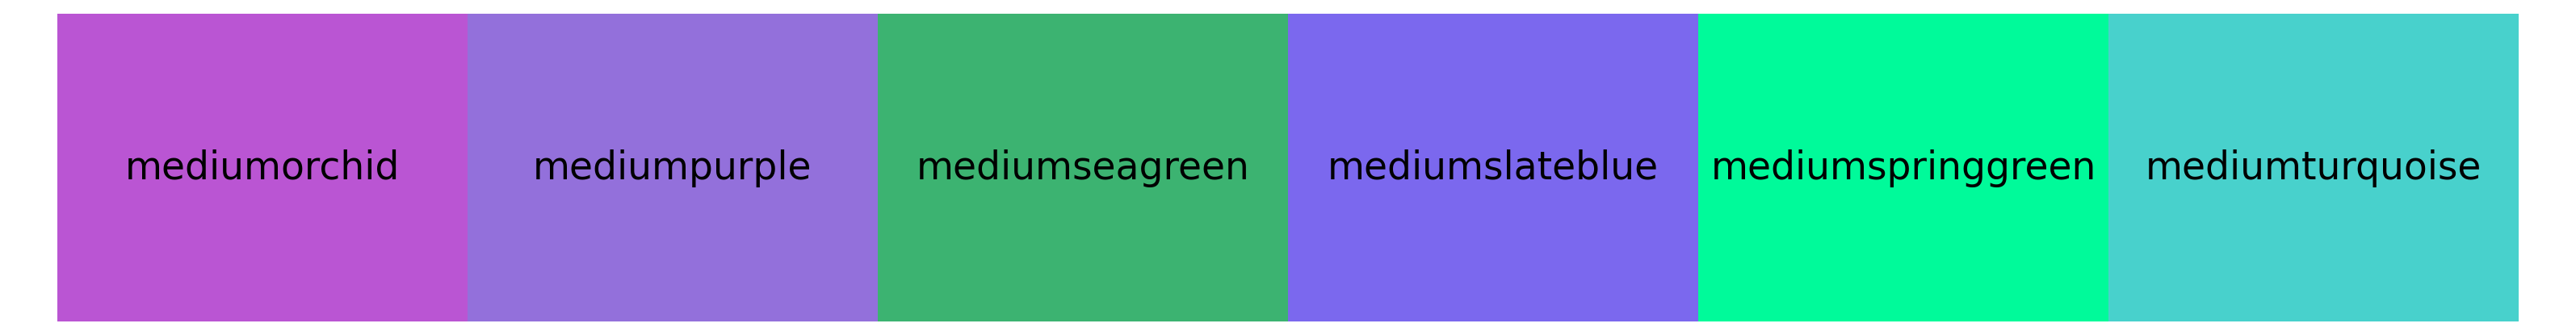

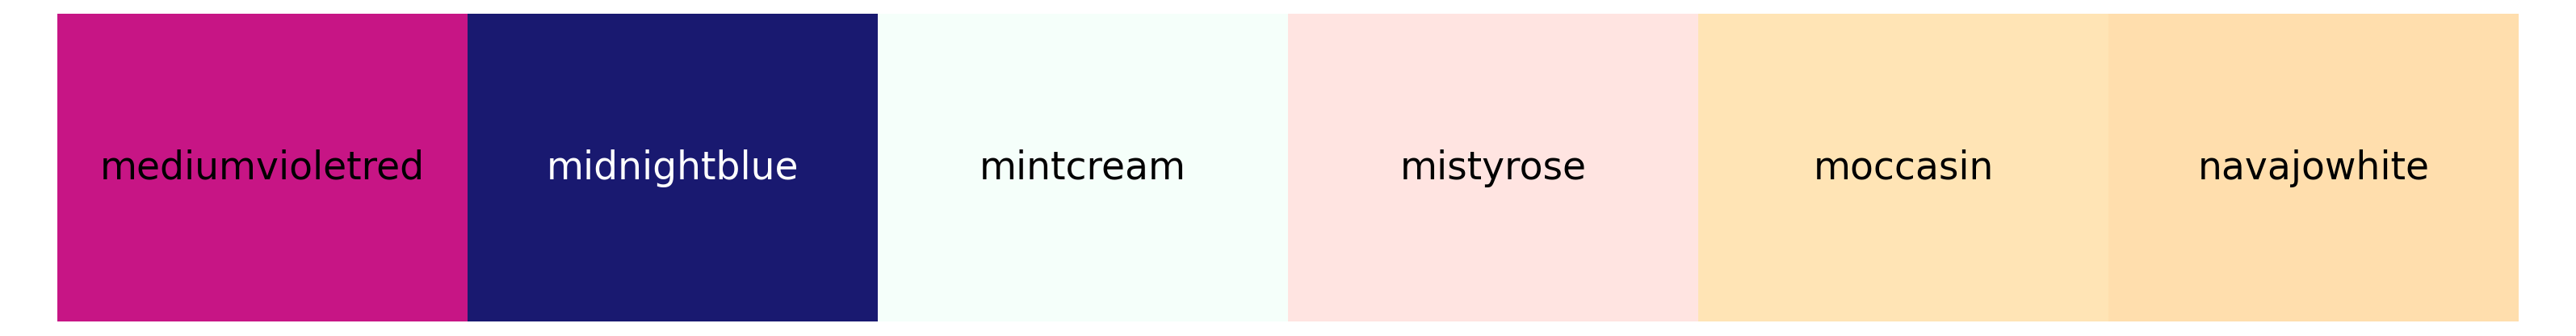

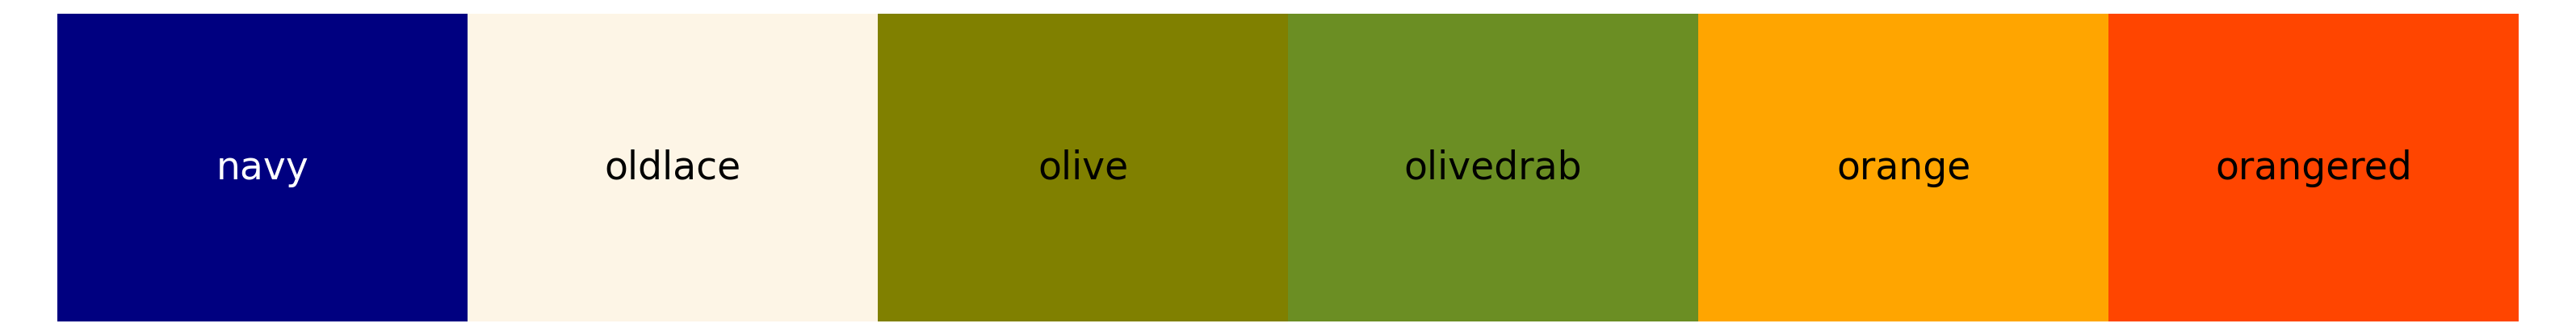

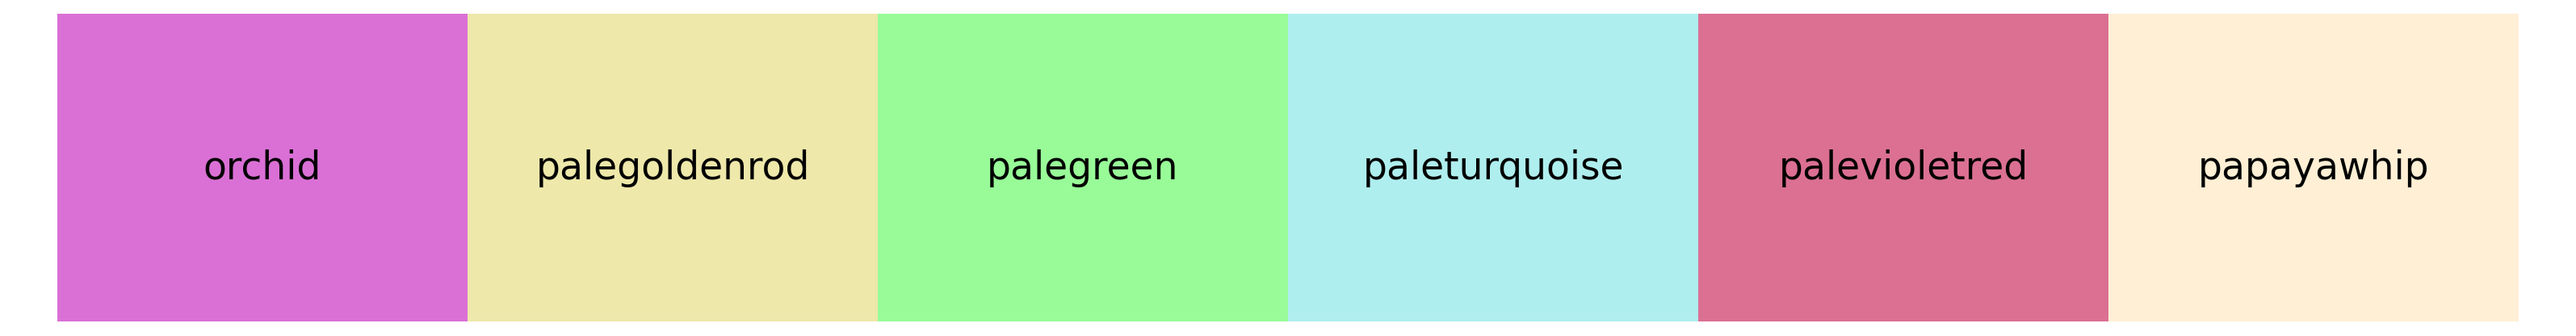

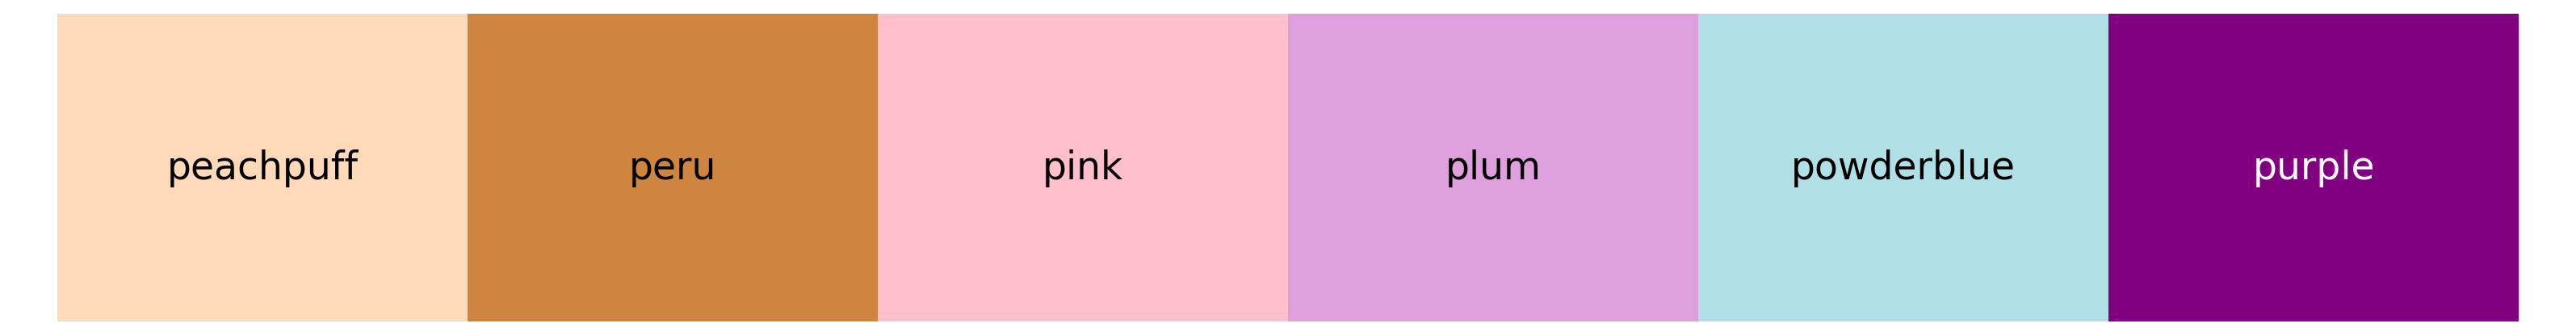

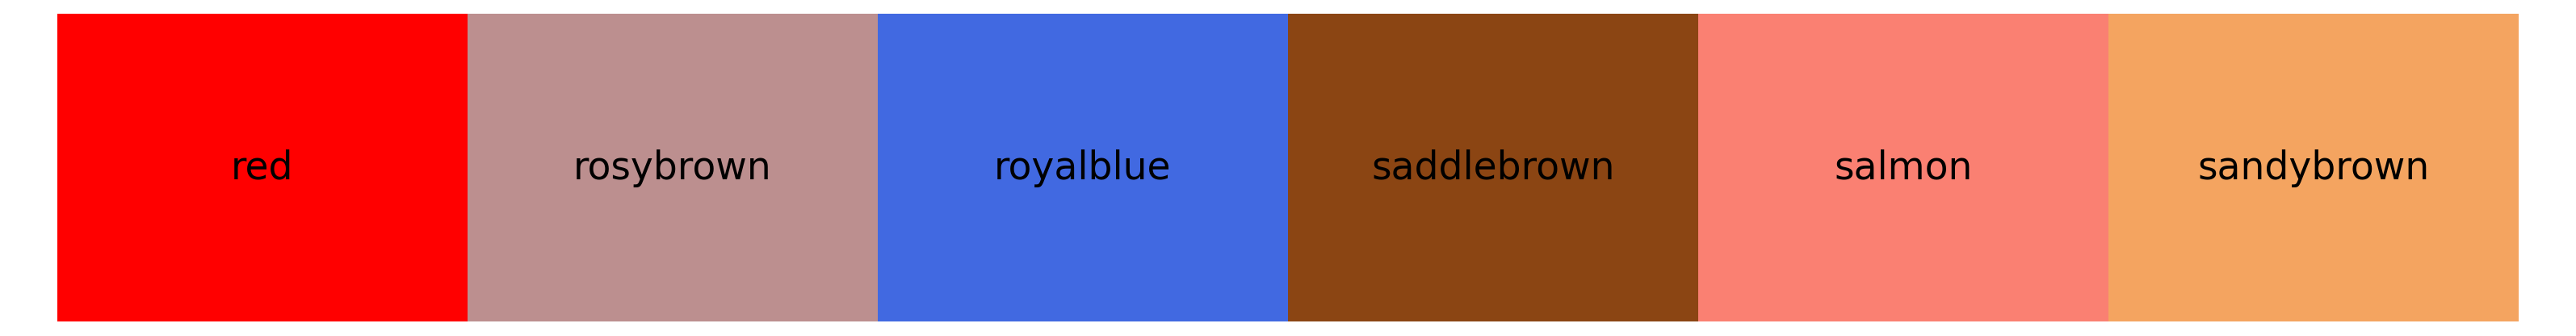

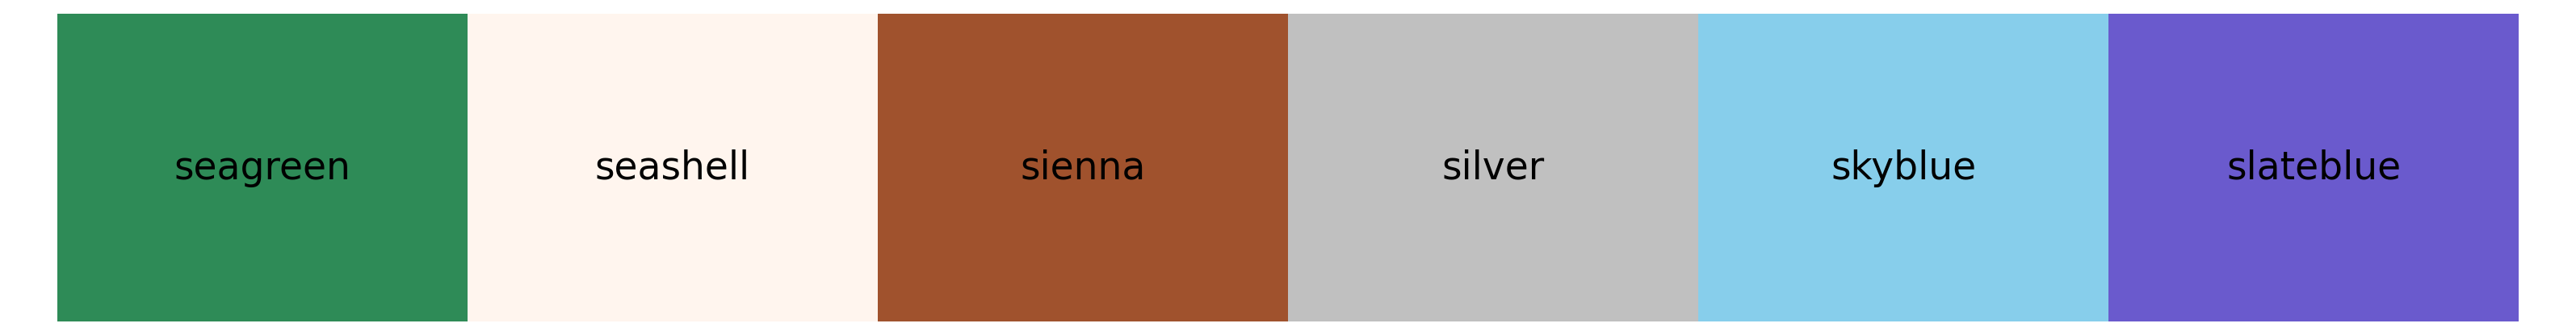

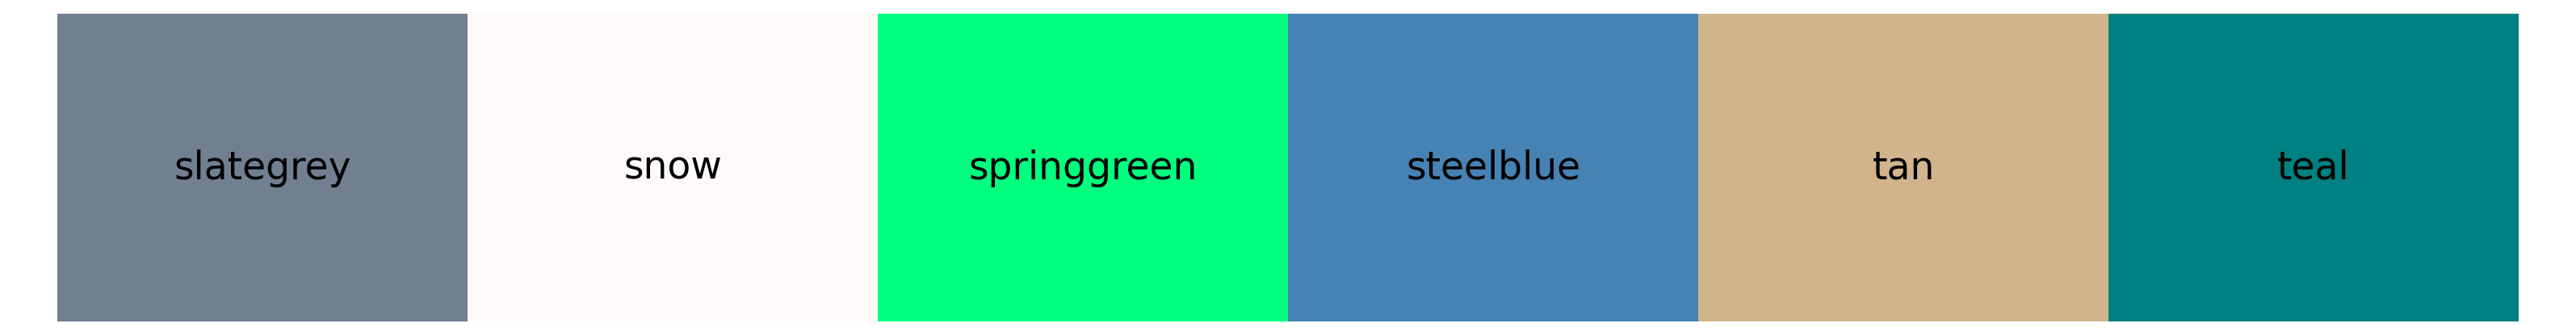

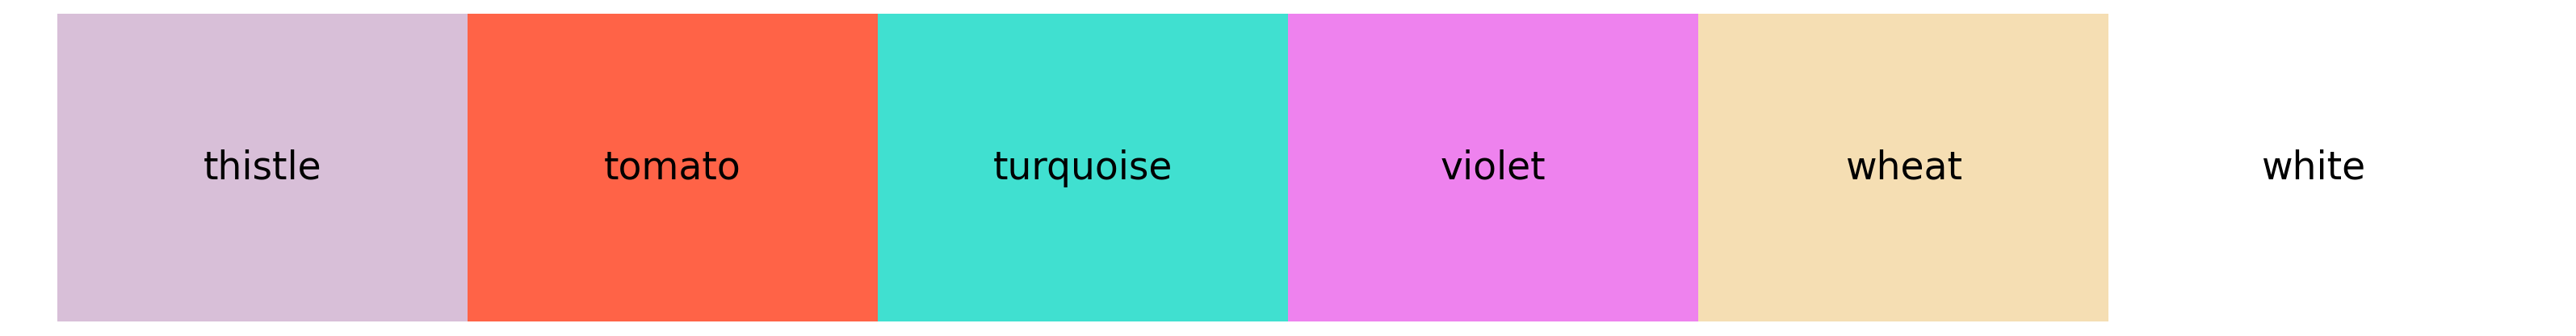

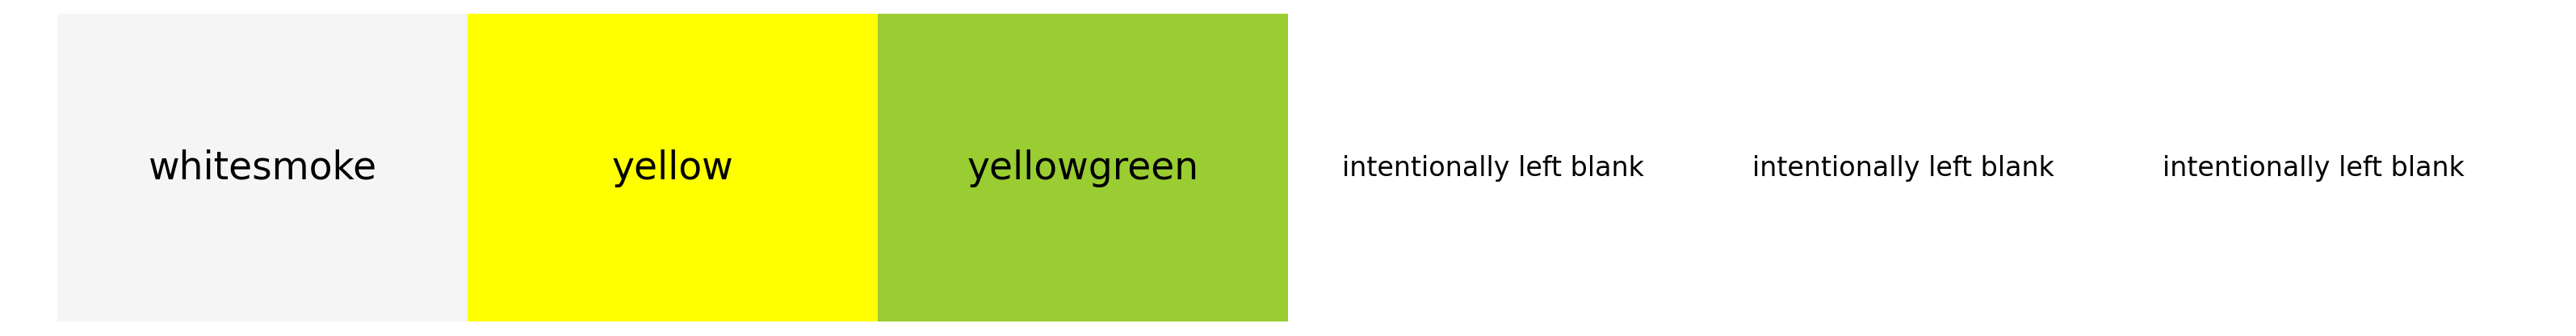

In [30]:
def map_col(refcol):
    '''Map color names.'''
    newcol = 'black' 
    comcol = {'black':         'white', 
              'blue':          'white',
              'darkblue':      'white',
              'darkgreen':     'white',
              'darkmagenta':   'white',
              'darkred':       'white',
              'darkslateblue': 'white',
              'darkslategrey': 'white', 
              'darkviolet':    'white',
              'dimgrey':       'white',
              'firebrick':     'white',
              'indigo':        'white',
              'maroon':        'white',
              'mediumblue':    'white',
              'midnightblue':  'white',
              'navy':          'white',
              'purple':        'white'}
    for _, (k, v) in enumerate(comcol.items()):
        if k == refcol:
            newcol = v
    return newcol

def remove_double_colors(color_list):
    '''Remove double colors from the list.'''
    double = ['darkgray', 'darkslategray', 'dimgray', 'gray',
              'lightgray', 'lightslategray', 'slategray']
    for e in double:
        color_list.remove(e)       
    return color_list 

def remove_duplicats(color_list):
    '''Remove duplicats from a list.'''
    color_list = list(dict.fromkeys(color_list))
    return color_list
    
color_list = sorted(colors)
color_list=remove_duplicats(color_list)
color_list=remove_double_colors(color_list)

def color_chart(color_list, txtcol='black', txtsiz=34, rows=6, figuresize=32, aspectratio=0.75):
    '''Plot a color chart to the notebook.'''
    # Get length of list.
    listlen = len(color_list)
    # Set index and row counter.
    colidx = 0
    count = 0
    # Calculate number of rows.
    num = int((listlen/rows).n())+1
    # Loop over the number of rows.
    for i in range(0, num):
        colidx += 1
        if colidx <= listlen:
            txtcol = map_col(color_list[count])
            sq = polygon([(0,0), (0,1), (1,1), (1,0)], color=color_list[count], axes=False)
            sq += text(color_list[count], (0.5,0.5), fontsize=txtsiz, color=txtcol)
            # Loop over the number of squares per row.
            for j in range(1,6):
                colidx += 1
                x0, x1, x2 = 0+j, 1+j, 0.5+j
                y0, y1, y2 = 0, 1, 0.5            
                if colidx <= listlen:
                    txtcol = map_col(color_list[count+j])       
                    sq += polygon([(x0,y0), (x0,y1), (x1,y1), (x1,y0)], color=color_list[count+j], axes=False)
                    sq += text(color_list[count+j], (x2,y2),fontsize=txtsiz, color=txtcol)
                else: 
                    sq += polygon([(x0,y0), (x0,y1), (x1,y1), (x1,y0)], color='white', axes=False)
                    sq += text('intentionally left blank', (x2,y2),fontsize=24, color=txtcol)
        sq.show(figsize=figuresize, aspect_ratio=aspectratio)
        count+=6
    # End of function. Return None.    
    return None

color_chart(color_list)